(https://www.kaggle.com/agzamovr/a-very-extensive-exploratory-analysis-in-python/)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

### Training Data

In [32]:
train_df = pd.read_csv("data/train.csv", parse_dates=['timestamp'])

In [33]:
train_df.shape

(30471, 292)

In [34]:
train_df.head(10)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [65]:
# Use numpy to calculate log(1 + x), the natural logarithm of one plus the input array, element-wise.
train_df['price_doc_log'] = np.log1p(train_df['price_doc'])

### Missing Data

In [35]:
train_na = (train_df.isnull().sum() / len(train_df)) * 100
train_na

id                                        0.000000
timestamp                                 0.000000
full_sq                                   0.000000
life_sq                                  20.947786
floor                                     0.548062
max_floor                                31.413475
material                                 31.413475
build_year                               44.649011
num_room                                 31.413475
kitch_sq                                 31.413475
state                                    44.498047
product_type                              0.000000
sub_area                                  0.000000
area_m                                    0.000000
raion_popul                               0.000000
green_zone_part                           0.000000
indust_part                               0.000000
children_preschool                        0.000000
preschool_quota                          21.948738
preschool_education_centers_rai

In [36]:
# Remove all column names where no data is missing
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)

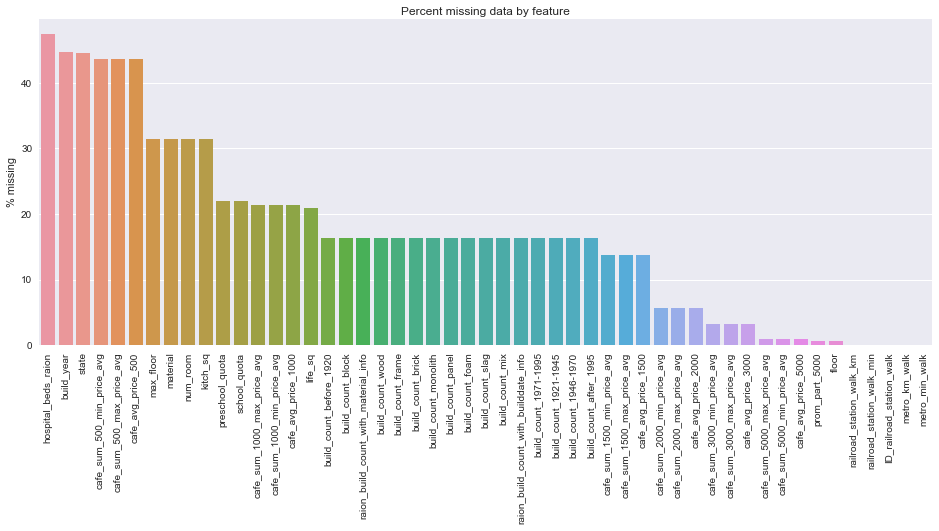

In [37]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
plt.title('Percent missing data by feature')
plt.ylabel('% missing');

### Data Quality Issues

In [38]:
train_df['state'].unique()

array([ nan,   3.,   1.,   2.,   4.,  33.])

#### Investigating the 'state' feature

In [39]:
train_df['state'].value_counts()

2.0     5844
3.0     5790
1.0     4855
4.0      422
33.0       1
Name: state, dtype: int64

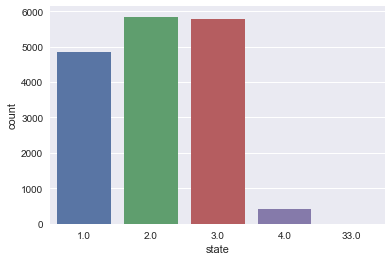

In [40]:
sns.countplot(train_df['state']);

In [41]:
# state should be discrete valued between 1 and 4. There is a 33 in it that is cleary a data entry error
train_df.loc[train_df['state'] == 33]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [42]:
# Lets just replace it with the mode.
train_df['state'].mode()

0    2.0
dtype: float64

In [43]:
train_df.loc[train_df['state'] == 33, 'state'] = train_df['state'].mode().iloc[0]

In [44]:
# Or we could have replced it with 3 assuming it was intended to be 3 but mistyped as 33
# train_df.loc[train_df['state'] == 33, 'state'] = 3

In [ ]:
# build_year has an erronus value 20052009. Since its unclear which it should be, let's replace with 2007

#### Investigating the 'build_year' feature

In [52]:
# build_year has an erronus value 20052009. Since its unclear which it should be, let's replace with 2007
train_df.loc[train_df['build_year'] == 20052009, 'build_year'] = 2007

### Housing Internal Characteristics

In [53]:
internal_chars = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 'kitch_sq', 'state', 'price_doc']
corrmat = train_df[internal_chars].corr()

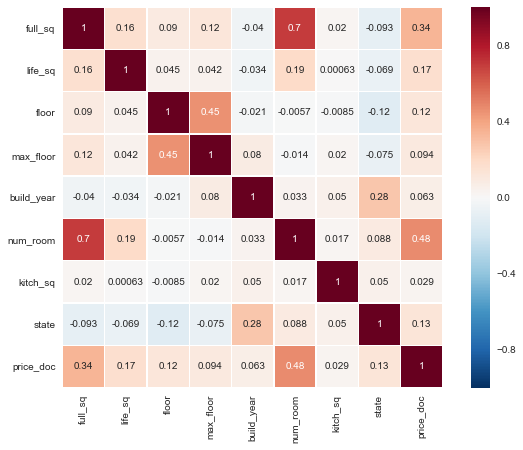

In [55]:
plt.figure(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True);

### Area of Home and Number of Rooms

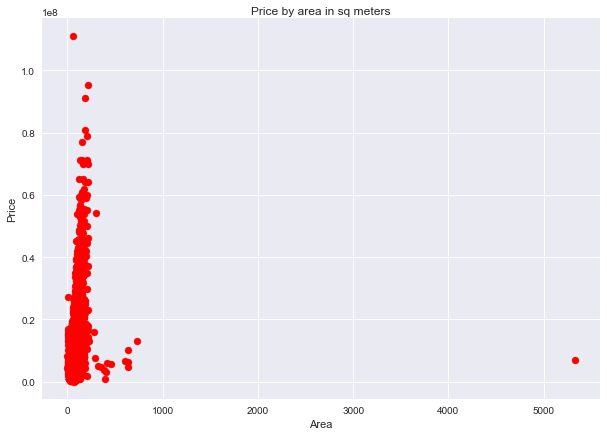

In [58]:
plt.figure(figsize=(10, 7))
plt.scatter(x=train_df['full_sq'], y=train_df['price_doc'], c='r');
plt.title('Price by area in sq meters')
plt.xlabel('Area')
plt.ylabel('Price');

#### Removing the anomalous points

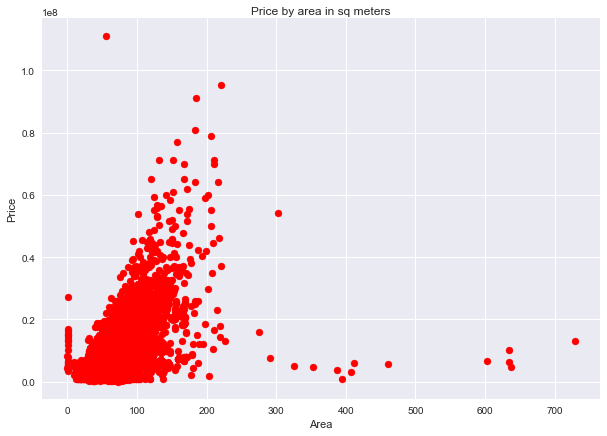

In [60]:
plt.figure(figsize=(10, 7))
ind = train_df[train_df['full_sq'] > 2000].index
plt.scatter(x=train_df.drop(ind)['full_sq'], y=train_df.drop(ind)['price_doc'], c='r');
plt.title('Price by area in sq meters')
plt.xlabel('Area')
plt.ylabel('Price');

### Data points where Living Area is more than the Total Area

In [63]:
(train_df['life_sq'] > train_df['full_sq']).sum()

37

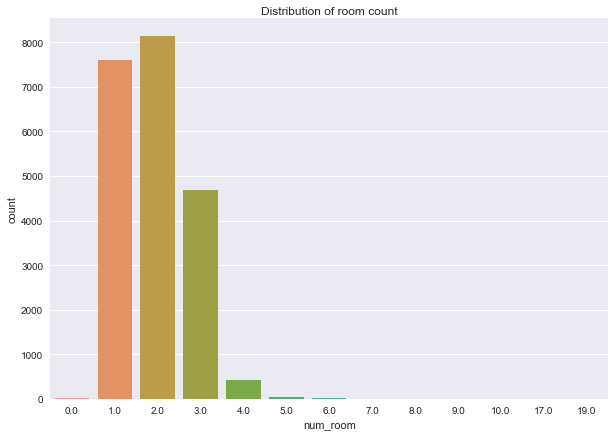

In [66]:
plt.figure(figsize=(10, 7))
sns.countplot(x=train_df['num_room'])
plt.title('Distribution of room count')
plt.xlabel('num_room');

## Sale Type

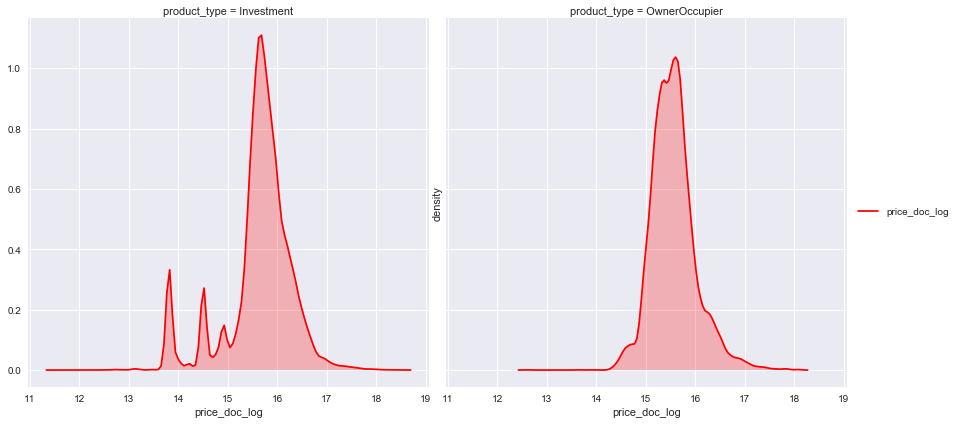

In [71]:
g = sns.FacetGrid(train_df, col="product_type", size=6)
g.map(sns.kdeplot, "price_doc_log", color="r", shade=True)
g.add_legend()
plt.ylabel('density');

#f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
#train_df.drop(train_df['product_type'] == 'Investment')["price_doc_log"].plot.kde(ax=ax[0])
#train_df.drop(train_df['product_type'] == 'OwnerOccupier')["price_doc_log"].plot.kde(ax=ax[1])
#ax[0].set(xlabel='price_log')
#ax[1].set(xlabel='price_log')

### Median House Price per product_type

In [72]:
train_df.groupby('product_type')['price_doc'].median()

product_type
Investment       6670000
OwnerOccupier    5564090
Name: price_doc, dtype: int64

### Build Year

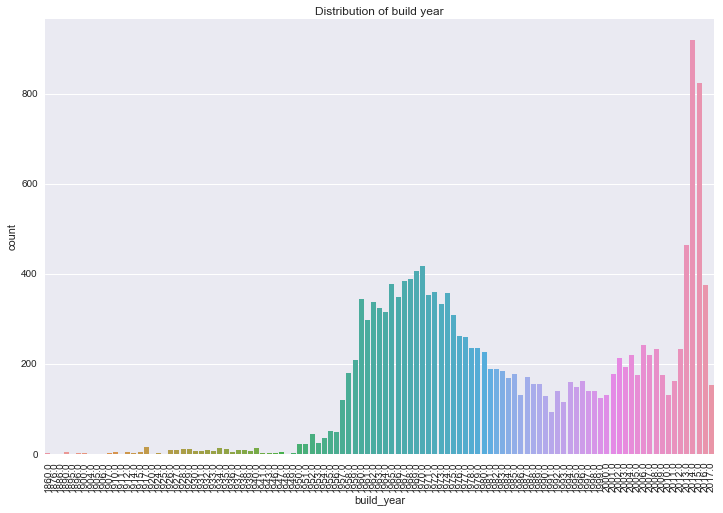

In [74]:
plt.figure(figsize=(12, 8))
ind = train_df[(train_df['build_year'] <= 1691) | (train_df['build_year'] >= 2018)].index
by_df = train_df.drop(ind).sort_values(by=['build_year'])
sns.countplot(by_df['build_year'])
plt.title('Distribution of build year')
plt.xticks(rotation='90');

### Mean Price By Build Year

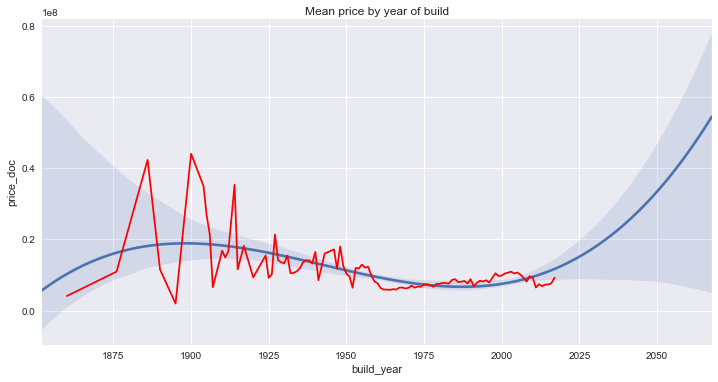

In [91]:
plt.figure(figsize=(12, 6))
by_price = by_df.groupby('build_year')[['build_year', 'price_doc']].mean()
sns.regplot(x="build_year", y="price_doc", data=by_price, scatter=False, order=3, truncate=False)
plt.plot(by_price['build_year'], by_price['price_doc'], color='r')
plt.title('Mean price by year of build');

### Timestamp

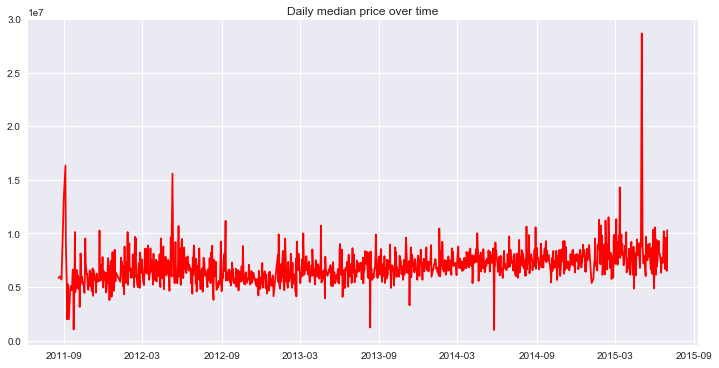

In [92]:
plt.figure(figsize=(12, 6))
ts_df = train_df.groupby('timestamp')[['price_doc']].mean()
#sns.regplot(x="timestamp", y="price_doc", data=ts_df, scatter=False, truncate=True)
plt.plot(ts_df.index, ts_df['price_doc'], color='r', )
plt.title('Daily median price over time');

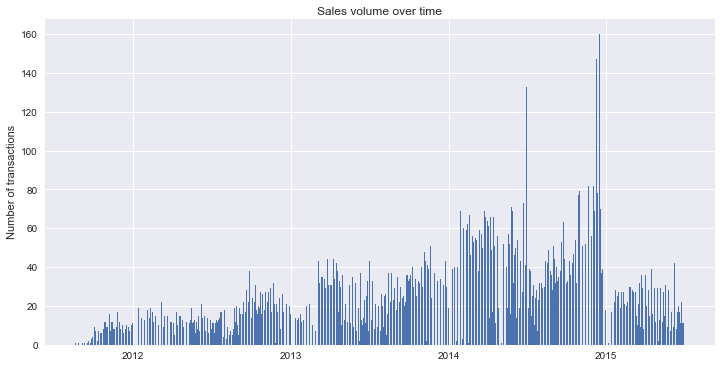

In [94]:
import datetime
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
yearsFmt = mdates.DateFormatter('%Y')
ts_vc = train_df['timestamp'].value_counts()
f, ax = plt.subplots(figsize=(12, 6))
plt.bar(left=ts_vc.index, height=ts_vc)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.set(title='Sales volume over time', ylabel='Number of transactions');